In [1]:
import tensorflow as tf

In [2]:
dev_ds = tf.data.TFRecordDataset("/data/kmnist_dev.tfrecord")

In [3]:
def _parse_function(example_proto):
  # Parse the input tf.Example proto using the dictionary below.
    feature_description = {
        'label': tf.io.FixedLenFeature([], tf.int64, default_value=0),
        'image_raw': tf.io.FixedLenFeature([], tf.string, default_value=''),
    }
    return tf.io.parse_single_example(example_proto, feature_description)


In [4]:
dev_ds = dev_ds.map(_parse_function)

In [5]:
def parse_features(kmnist_ds):

    def _transform_img(img_dict):

        image = tf.io.parse_tensor(img_dict["image_raw"], tf.uint8)

        return dict(
            image = tf.reshape(image, [28, 28]) ,
            label = img_dict["label"]
        )

    return kmnist_ds.map(_transform_img)

In [6]:
dev_ds = parse_features(dev_ds)

In [7]:
dev_ds

<MapDataset shapes: {image: (28, 28), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [8]:
import matplotlib.pyplot as plt

tf.Tensor(3, shape=(), dtype=int64)


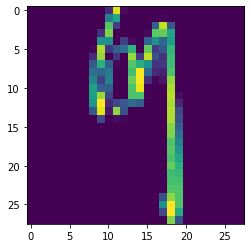

In [9]:
for record in dev_ds.take(1):
    print(record["label"])
    plt.imshow(record["image"])